<a href="https://colab.research.google.com/github/Lexie-v2/Goggle-CO/blob/main/S1_Tarea_NRC_9188_Vanesa_Vera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## S1 Laboratorio - Percepcion Computacional

Alumna: Vera Romero Vanesa
Docente: Ing. Armando Caballero

1. Carga y Visualización de una Imagen:

* Carga una imagen a color usando OpenCV.
* Convierte la imagen a escala de grises y muéstrala junto con la imagen original.
* Imprime las dimensiones de ambas imágenes (ancho, alto y canales).

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


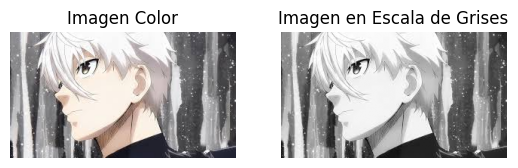

Dimensiones de la imagen color: (168, 300, 3)
Dimensiones de la imagen en escala de grises: (168, 300)


In [20]:
#Solución
from google.colab import drive
import cv2
import matplotlib.pyplot as plt

drive.mount('/content/drive')
ruta = '/content/drive/MyDrive/PC/nagi.jpg'

image_color = cv2.imread(ruta)
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
plt.title('Imagen Color')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_gray, cmap='gray')
plt.title('Imagen en Escala de Grises')
plt.axis('off')

plt.show()

print("Dimensiones de la imagen color:", image_color.shape)
print("Dimensiones de la imagen en escala de grises:", image_gray.shape)

2. Normalización de una Imagen:

* Carga una imagen en escala de grises.
* Normaliza los valores de los píxeles al rango [0, 1].
* Muestra la imagen normalizada y su matriz (primeros 5x5 píxeles).

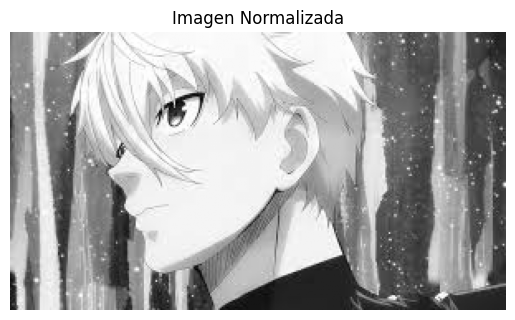

Matriz de la imagen normalizada (primeros 5x5 píxeles):
[[0.45098039 0.50980392 0.55294118 0.55294118 0.55294118]
 [0.45490196 0.51372549 0.55294118 0.55294118 0.55294118]
 [0.45882353 0.51764706 0.55686275 0.55294118 0.55294118]
 [0.46666667 0.52156863 0.56078431 0.55686275 0.54901961]
 [0.4745098  0.52941176 0.56470588 0.55686275 0.54901961]]


In [21]:
#Solución
import numpy as np

imagen_normalizada = image_gray / 255.0

plt.imshow(imagen_normalizada, cmap='gray')
plt.title('Imagen Normalizada')
plt.axis('off')
plt.show()

print("Matriz de la imagen normalizada (primeros 5x5 píxeles):")
print(imagen_normalizada[:5, :5])

3. Extracción de una Región de Interés (ROI):

* Carga una imagen y selecciona una región rectangular (ROI).
* Muestra la ROI en una ventana separada.
* Guarda la ROI como una nueva imagen.

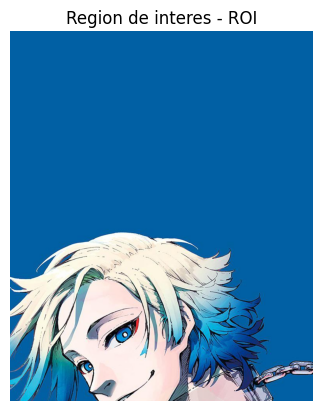

True

In [26]:
#Solución

image_color = cv2.imread('/content/drive/MyDrive/PC/kaiser.jpg')

roi = image_color[50:1000, 50:1000]
plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
plt.title('Region de interes - ROI')
plt.axis('off')
plt.show()

cv2.imwrite('roi.jpg', roi)



4. Conversión de Espacios de Color:

* Carga una imagen a color.
* Convierte la imagen de BGR (OpenCV) a HSV.
* Muestra la imagen en el espacio de color HSV.

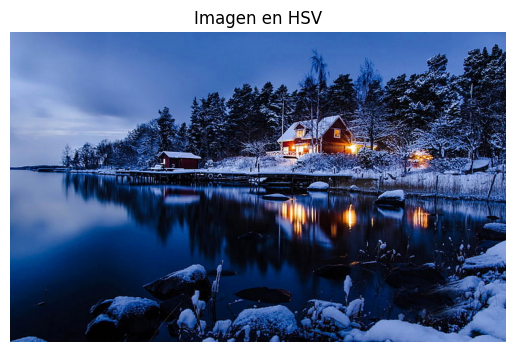

In [27]:
#Solución
image_color = cv2.imread('/content/drive/MyDrive/PC/nevado.jpg')

image_hsv = cv2.cvtColor(image_color, cv2.COLOR_BGR2HSV)

plt.imshow(cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB))
plt.title('Imagen en HSV')
plt.axis('off')
plt.show()

5. Carga y Visualización de una Señal de Audio:

* Carga un archivo de audio mono.
* Grafica la señal de audio en el dominio del tiempo.
* Imprime la frecuencia de muestreo y la duración del audio.

/tmp/ipython-input-3077816865.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, audio = wavfile.read(ruta_audio)


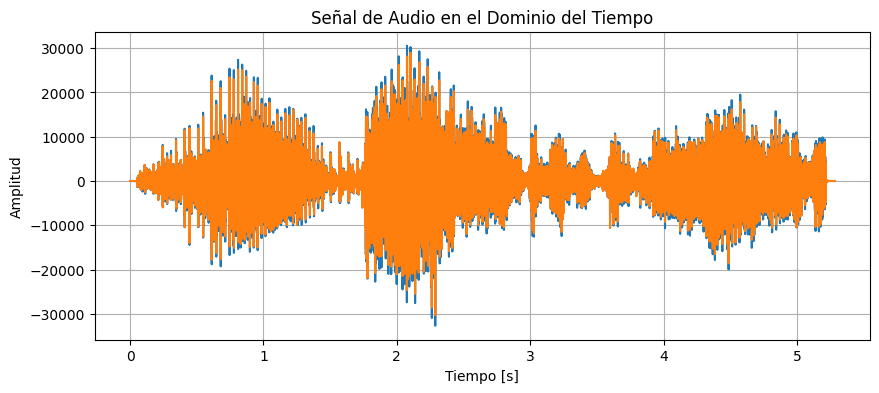

Frecuencia de muestreo (Hz):  44100
Duración del audio (s): 5.280748299319728


In [37]:
#Solución
import scipy.io.wavfile as wavfile

ruta_audio = '/content/drive/MyDrive/PC/audio.wav'

fs, audio = wavfile.read(ruta_audio)

duracion = len(audio) / fs

tiempo = np.linspace(0, duracion, len(audio))

plt.figure(figsize=(10,4))
plt.plot(tiempo, audio)
plt.title("Señal de Audio en el Dominio del Tiempo")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

print("Frecuencia de muestreo (Hz): ", fs)
print("Duración del audio (s):", duracion)

6. Normalización de una Señal de Audio:

* Carga un archivo de audio estéreo.
* Normaliza los valores de amplitud al rango [-1, 1].
* Grafica ambas señales (canales izquierdo y derecho) después de la normalización.

/tmp/ipython-input-536611995.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, audio = wavfile.read(ruta_audio)


Dimensiones del audio: (232881, 2)


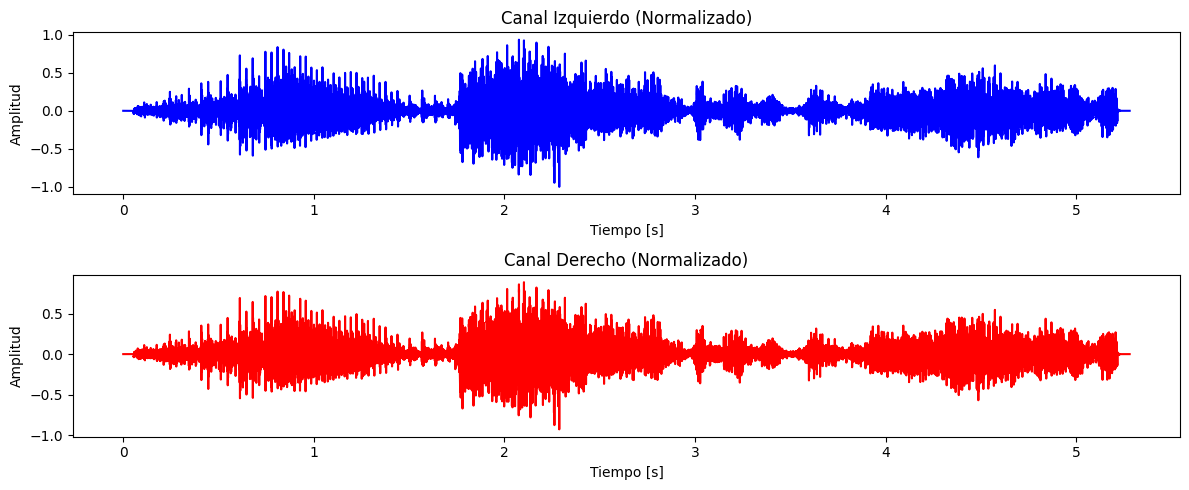

Frecuencia de muestreo (Hz): 44100
Duración (s): 5.280748299319728


In [40]:
#Solución
ruta_audio = '/content/drive/MyDrive/PC/audio.wav'

fs, audio = wavfile.read(ruta_audio)

print("Dimensiones del audio:", audio.shape)

audio_normalizado = audio / np.max(np.abs(audio))

canal_izq = audio_normalizado[:,0]
canal_der = audio_normalizado[:,1]

duracion = len(audio) / fs
tiempo = np.linspace(0, duracion, len(audio))

plt.figure(figsize=(12,5))
plt.subplot(2,1,1)
plt.plot(tiempo, canal_izq, color="blue")
plt.title("Canal Izquierdo (Normalizado)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")

plt.subplot(2,1,2)
plt.plot(tiempo, canal_der, color="red")
plt.title("Canal Derecho (Normalizado)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")

plt.tight_layout()
plt.show()

print("Frecuencia de muestreo (Hz):", fs)
print("Duración (s):", duracion)

7. Simulación de un Sensor de Temperatura:

* Simula un sensor de temperatura que genera valores aleatorios entre 15°C y 35°C.
* Captura 15 mediciones, una por segundo, y guárdalas en una lista.
* Grafica los datos de temperatura en función del tiempo.

In [ ]:
#Solución



8. Simulación de un Sensor de Humedad:

* Simula un sensor de humedad que genera valores aleatorios entre 0% y 100%.
* Captura 20 mediciones, una cada 0.5 segundos, y guárdalas en una lista.
* Grafica los datos de humedad en función del tiempo.

In [ ]:
#Solución


9. Carga y Extracción de Frames de un Video:

* Carga un video y muestra el primer frame.
* Extrae y guarda un frame cada 10 segundos.
* Muestra el número total de frames extraídos.

FPS: 30, Total frames: 1186, Duración: 39.53 s


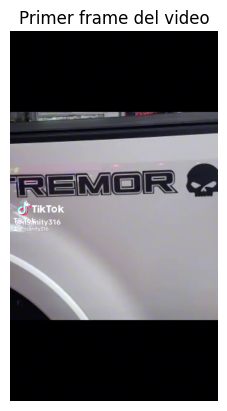

Total de frames extraídos: 5


In [42]:
#Solución

import cv2
import matplotlib.pyplot as plt

ruta_video = "/content/drive/MyDrive/PC/video.mp4"

video = cv2.VideoCapture(ruta_video)

if not video.isOpened():
    print("Error al abrir el video")
else:
    # propiedades del video
    fps = int(video.get(cv2.CAP_PROP_FPS))           # frames por segundo
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    duracion = total_frames / fps
    print(f"FPS: {fps}, Total frames: {total_frames}, Duración: {duracion:.2f} s")

    ret, frame = video.read()
    if ret:
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.title("Primer frame del video")
        plt.axis("off")
        plt.show()
    else:
        print("No se pudo leer el primer frame")

    frames_extraidos = 0
    video.set(cv2.CAP_PROP_POS_FRAMES, 0)

    while True:
        pos = int(video.get(cv2.CAP_PROP_POS_FRAMES))
        tiempo_seg = pos / fps

        ret, frame = video.read()
        if not ret:
            break

        # Guardar un frame cada 10 segundos
        if tiempo_seg % 10 < 1/fps:
            nombre = f"frame_{frames_extraidos}.png"
            cv2.imwrite(nombre, frame)
            frames_extraidos += 1

    video.release()
    print("Total de frames extraídos:", frames_extraidos)


10. Conversión de un Video a Escala de Grises:

* Carga un video y convierte cada frame a escala de grises.
* Guarda el video en escala de grises como un nuevo archivo.
* Muestra el primer frame del video en escala de grises.

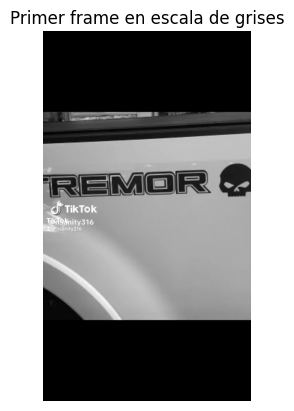

Video en escala de grises guardado como 'video_gris.avi'


In [43]:
#Solución

video = cv2.VideoCapture(ruta_video)

fps = int(video.get(cv2.CAP_PROP_FPS))
ancho = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
alto = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter("video_gris.avi", fourcc, fps, (ancho, alto), isColor=False)

primer_frame_gris = None

while True:
    ret, frame = video.read()
    if not ret:
        break

    gris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    out.write(gris)

    if primer_frame_gris is None:
        primer_frame_gris = gris

video.release()
out.release()

# Mostrar primer frame en escala de grises
plt.imshow(primer_frame_gris, cmap="gray")
plt.title("Primer frame en escala de grises")
plt.axis("off")
plt.show()

print("Video en escala de grises guardado como 'video_gris.avi'")
